In [1]:
import pandas as pd

In [103]:
df_dimitar = pd.read_csv('~/Downloads/dimitar.csv')
df_dimitar['Account'] = 'Dimitar'

df_ivan = pd.read_csv('~/Downloads/ivan.csv')
df_ivan['Account'] = 'Ivan'

# Merged accounts in reversed order, sorted by date
df = pd.merge_ordered(df_ivan, df_dimitar).iloc[::-1]
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce', dayfirst=True)
df.set_index('Transaction Date', inplace=True)
df = df.sort_values(by='Transaction Date')
df.drop(columns=['Account Number', 'Sort Code'], inplace=True)

In [104]:
df

,Transaction Type,Transaction Description,Debit Amount,Credit Amount,Balance,Account
Transaction Date,,,,,,
2023-04-11,DEB,MARKS&SPENCER PLC,41.17,NaN,8064.20,Ivan
2023-04-11,DEB,MONTFORT NEWS,4.58,NaN,8040.52,Ivan
2023-04-11,DEB,SAINSBURYS,3.20,NaN,8011.92,Ivan
2023-04-11,DEB,SAINSBURYS,10.85,NaN,8001.07,Ivan
2023-04-11,DEB,TFL TRAVEL CH,1.75,NaN,8045.10,Ivan
...,...,...,...,...,...,...
2024-04-04,DEB,MARKS&SPENCER PLC,19.00,NaN,13363.03,Ivan
2024-04-04,DEB,SAINSBURYS,2.20,NaN,13389.43,Ivan
2024-04-04,DEB,TFL TRAVEL CH,7.40,NaN,13382.03,Ivan


In [158]:
df[df['Transaction Description'].str.contains('bare', case=False)]

,Transaction Type,Transaction Description,Debit Amount,Credit Amount,Balance,Account
Transaction Date,,,,,,
2023-05-02,FPI,BARE CONDUCT,NaN,3299.55,8402.15,Ivan
2023-06-01,FPI,BARE CONDUCT,NaN,3409.39,9282.80,Ivan
2023-07-03,FPI,BARE CONDUCT,NaN,3409.79,9521.83,Ivan
2023-08-01,FPI,BARE CONDUCT,NaN,3409.41,10050.48,Ivan
2023-09-01,FPI,BARE CONDUCT,NaN,3409.38,4251.44,Ivan
2023-10-02,FPI,BARE CONDUCT,NaN,3409.79,25981.89,Ivan
2023-11-01,FPI,BARE CONDUCT,NaN,3654.40,3788.46,Ivan


<Axes: xlabel='Transaction Date'>

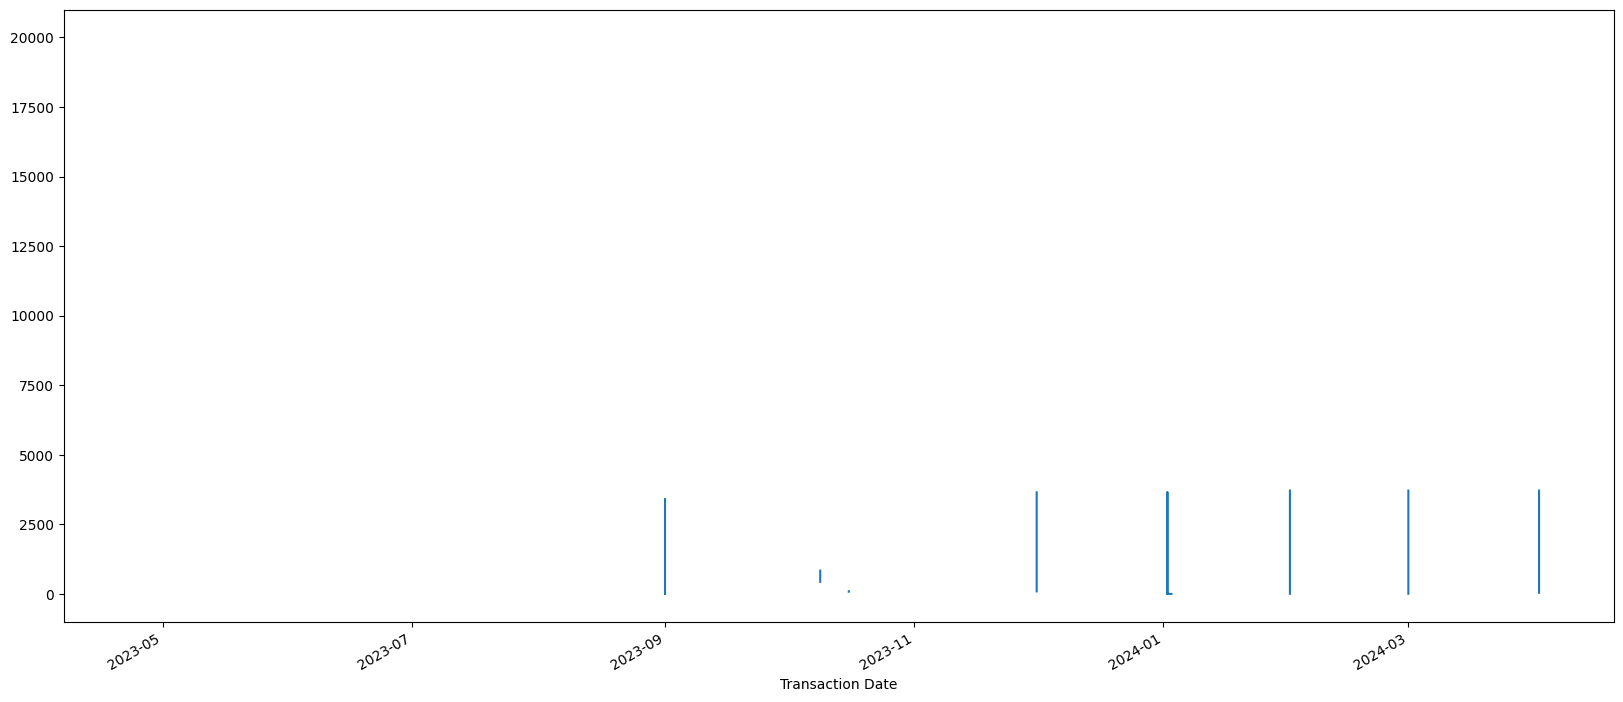

In [173]:
df['Credit Amount'].plot(figsize=(20,9))

In [ ]:
filtered_summary = debit_summary[debit_summary.index.str.contains('laiier', case=False)]

In [146]:
# Group by Transaction Description and calculate the total Debit Amount and counts
debit_summary = df.groupby('Transaction Description').agg({'Debit Amount': 'sum', 'Credit Amount': 'sum', 'Transaction Type': 'count'})

# Rename the columns for clarity
debit_summary.rename(columns={'Debit Amount': 'Total Debit Amount', 'Transaction Type': 'Total Counts'}, inplace=True)
debit_summary = debit_summary.sort_values(by='Total Debit Amount', ascending=False)
debit_summary

,Total Debit Amount,Credit Amount,Total Counts
Transaction Description,,,
STUDENT LOAN REPAY,27759.26,0.00,1
I KYULEV,9965.86,847.86,25
J WICHEANVANAGOON,7850.00,155.00,17
MARKS&SPENCER PLC,3012.32,0.00,170
THAI AIRWAYS,2265.13,0.00,2
...,...,...,...
FORIS DAX MT LIMIT,0.00,78.26,1
LAIIER LTD,0.00,18460.85,5
KYULEV I,0.00,100.00,2


In [192]:
filtered_summary = debit_summary[debit_summary.index.str.contains('apple', case=False)]
filtered_summary.sum()

Total Debit Amount    1054.27
Credit Amount            0.83
Total Counts            16.00
dtype: float64